# Howework 3: Optimization (Part 1, Optimization via Gradient Descent)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Optimizers code

In [2]:
def gradient_descent(f, grad_f, x0, alpha, maxit, tolx, tolf, backtracking=None):
    x_k = x0
    x_old = np.inf
    x_k_history = []
    x_k_history.append(x_k)

    grad_norm_0 = np.linalg.norm(grad_f(x0), 2)
    grad_norm_history = [grad_norm_0]
    grad_norm_k = grad_norm_0

    f_val_k = f(x_k)
    f_val_history = [f_val_k]

    k = 0
    while (k < maxit and
           np.linalg.norm(x_k - x_old, 2) >= tolx and
           grad_norm_k >= tolf*grad_norm_0):

        if backtracking is not None:
            alpha = backtracking(f, grad_f, x_k)

        x_old = x_k
        x_k = x_k - alpha*grad_f(x_k)
        x_k_history.append(x_k)

        grad_norm_k = np.linalg.norm(grad_f(x_k), 2)
        grad_norm_history.append(grad_norm_k)

        f_val_k = f(x_k)
        f_val_history.append(f_val_k)

        k += 1

    return x_k_history, k, f_val_history, grad_norm_history


In [3]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

### Function definition

In [4]:
def fn1(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_fn1(x):
    x1, x2 = x
    dx1 = 2*(x1 - 3)
    dx2 = 2*(x2 - 1)
    return np.array([dx1, dx2])

def fn2(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_fn2(x):
    x1, x2 = x
    dx1 = 20*(x1 - 1)
    dx2 = 2*(x2 - 2)
    return np.array([dx1, dx2])

def fn3(x):
    n = x.shape[0]
    v = np.linspace(0, 1, num=n, endpoint=True, axis=0)
    A = np.vander(v)

    x_true = np.ones(n)
    b = A @ x_true
    return (1/2) * np.linalg.norm(A@x - b, 2)**2

def grad_fn3(x):
    n = x.shape[0]
    v = np.linspace(0, 1, num=n, endpoint=True, axis=0)
    A = np.vander(v)

    x_true = np.ones(n)
    b = A @ x_true
    return (x.T @ A.T @ A - b.T @ A)

def fn4(x, lambda_reg):
    if (lambda_reg > 1) :
        lambda_reg = 1
    elif (lambda_reg < 0) :
        lambda_reg = 0

    return fn3(x) + (lambda_reg/2) * np.linalg.norm(x, 2)

def grad_fn4(x, lambda_reg):
    return grad_fn3(x) + lambda_reg * x.T

def fn5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_fn5(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

#### Testing GD on the functions

Function 1, alpha=0.1, GD got final result: [2.99996575 0.99998858], with 51 iterations, and grad_norm=7.221365590724354e-05
Function 2, alpha=0.1, GD got final result: [0. 2.], with 100 iterations, and grad_norm=20.0
Function 3, alpha=0.1, GD got final result: [0.99437454 1.00347673], with 100 iterations, and grad_norm=0.002525989293906238
Function 4, alpha=0.1, GD got final result: [0.72719139 0.90914118], with 79 iterations, and grad_norm=8.433271695948808e-05
Function 5, alpha=0.1, GD got final result: [0.9222264], with 9 iterations, and grad_norm=1.882708770395425e-05




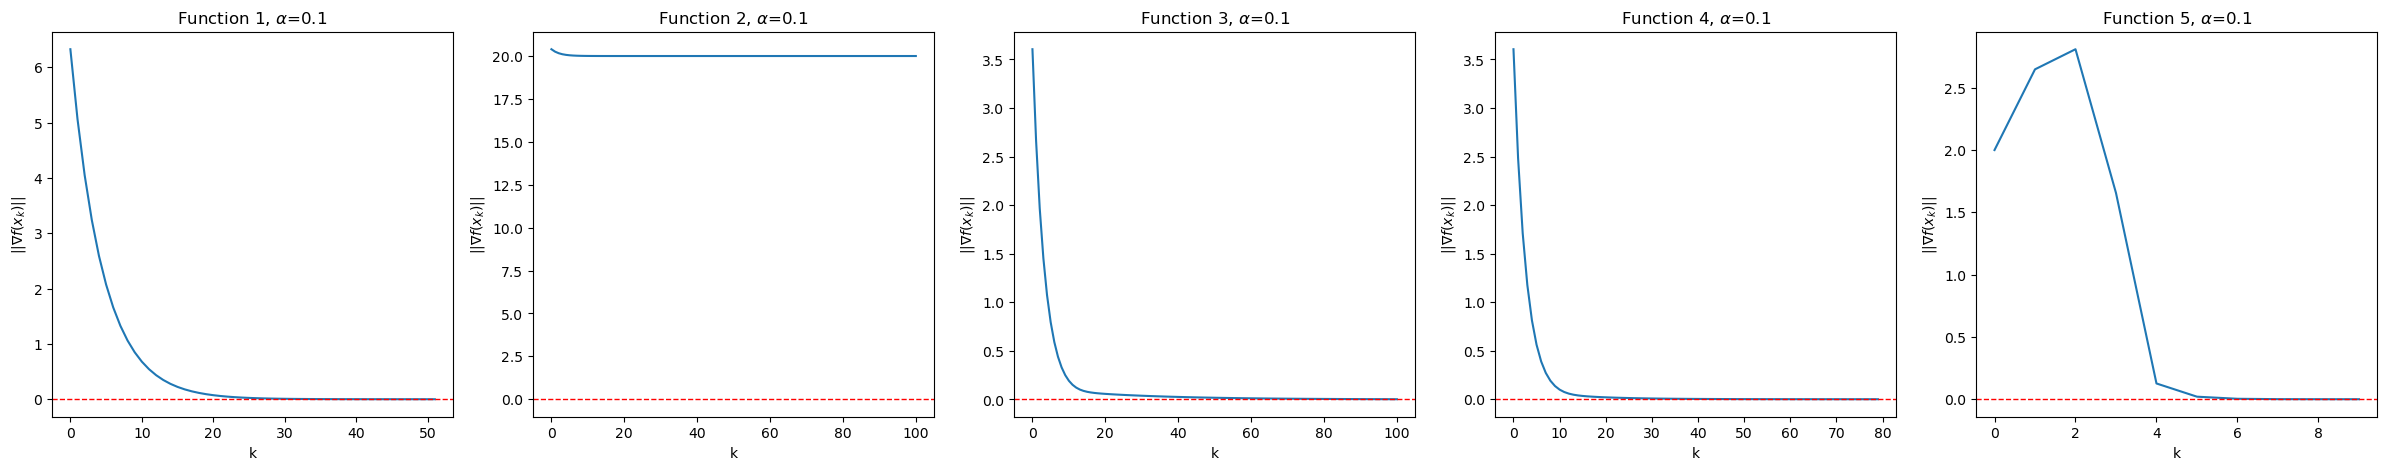

Function 1, alpha=0.01, GD got final result: [2.60214133 0.86738044], with 100 iterations, and grad_norm=0.8387597178148596
Function 2, alpha=0.01, GD got final result: [1.         1.73476089], with 100 iterations, and grad_norm=0.5304782235790122
Function 3, alpha=0.01, GD got final result: [0.7605196  1.03402367], with 100 iterations, and grad_norm=0.2675850604306518
Function 4, alpha=0.01, GD got final result: [0.65233406 0.89820814], with 100 iterations, and grad_norm=0.16010726916460838
Function 5, alpha=0.01, GD got final result: [0.9221562], with 95 iterations, and grad_norm=0.0008052009670187488




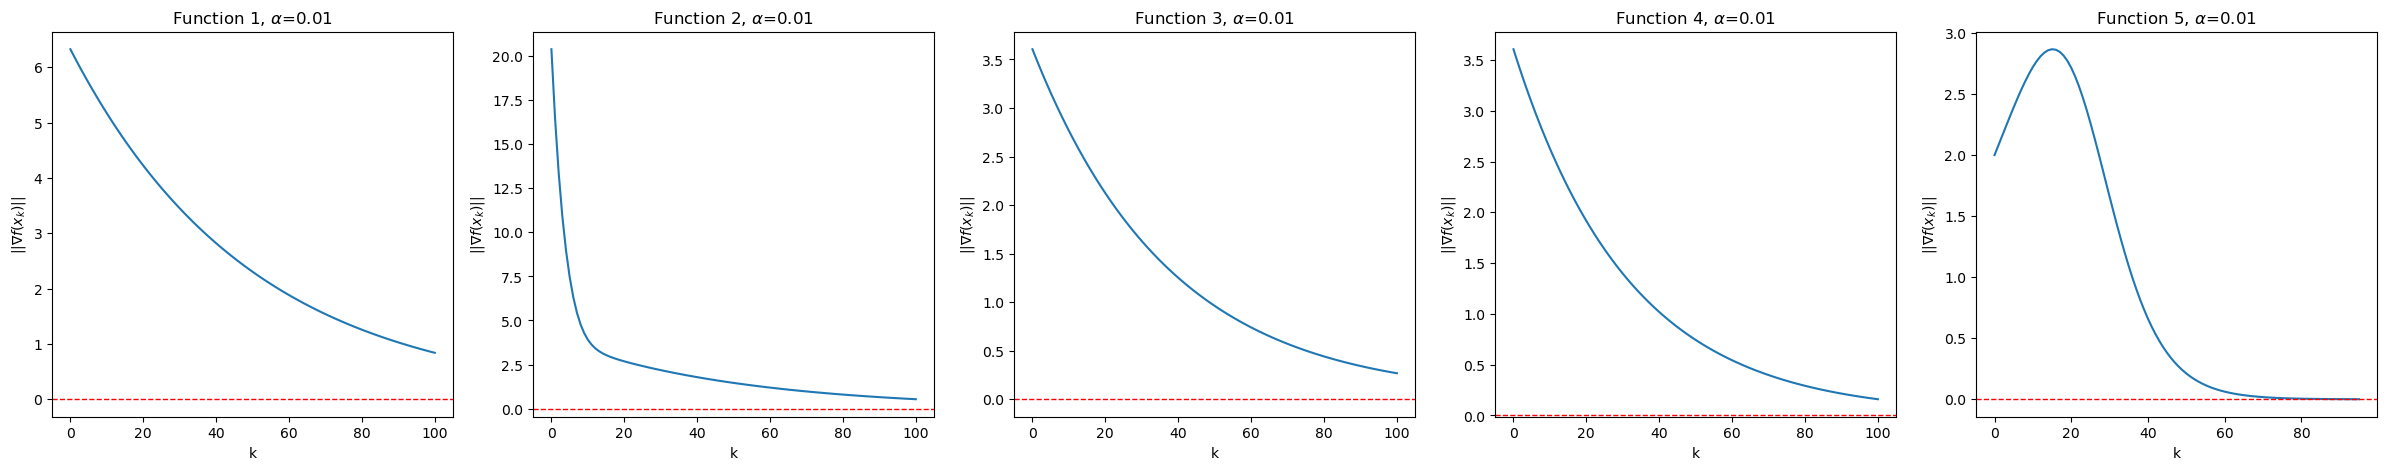

Function 1, alpha=0.001, GD got final result: [0.54429959 0.1814332 ], with 100 iterations, and grad_norm=5.177071039643256
Function 2, alpha=0.001, GD got final result: [0.86738044 0.36286639], with 100 iterations, and grad_norm=4.213787424882011
Function 3, alpha=0.001, GD got final result: [0.17722521 0.26359044], with 100 iterations, and grad_norm=2.77503283445929
Function 4, alpha=0.001, GD got final result: [0.17307883 0.25744217], with 100 iterations, and grad_norm=2.639313834172838
Function 5, alpha=0.001, GD got final result: [0.23832763], with 100 iterations, and grad_norm=2.728762253535974




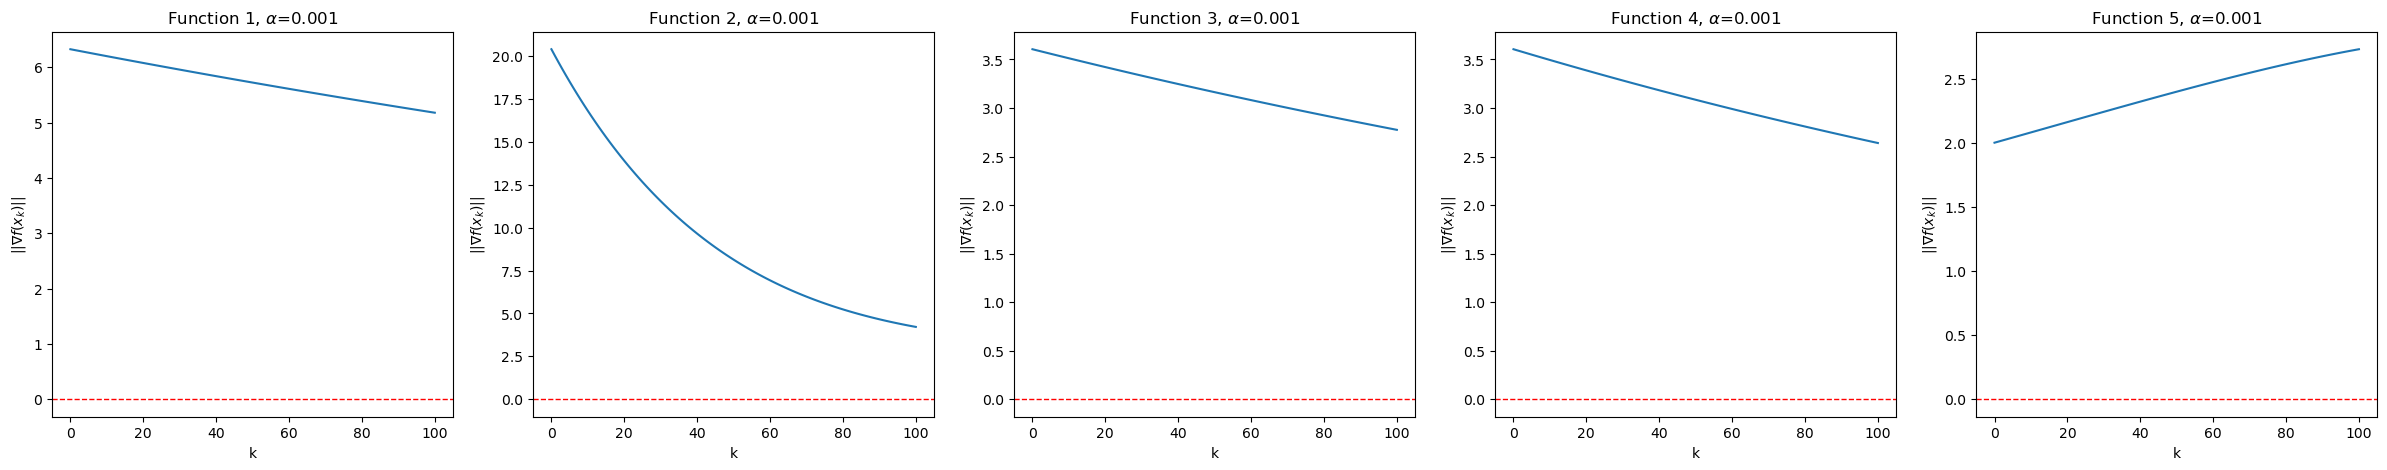

Function 1, alpha=0.0001, GD got final result: [0.05940986 0.01980329], with 100 iterations, and grad_norm=6.199308333966805
Function 2, alpha=0.0001, GD got final result: [0.1814332  0.03960657], with 100 iterations, and grad_norm=16.834286887865645
Function 3, alpha=0.0001, GD got final result: [0.01975459 0.02960737], with 100 iterations, and grad_norm=3.5124647875003223
Function 4, alpha=0.0001, GD got final result: [0.01970597 0.02953452], with 100 iterations, and grad_norm=3.494941287880364
Function 5, alpha=0.0001, GD got final result: [0.02039705], with 100 iterations, and grad_norm=2.0803061183044296




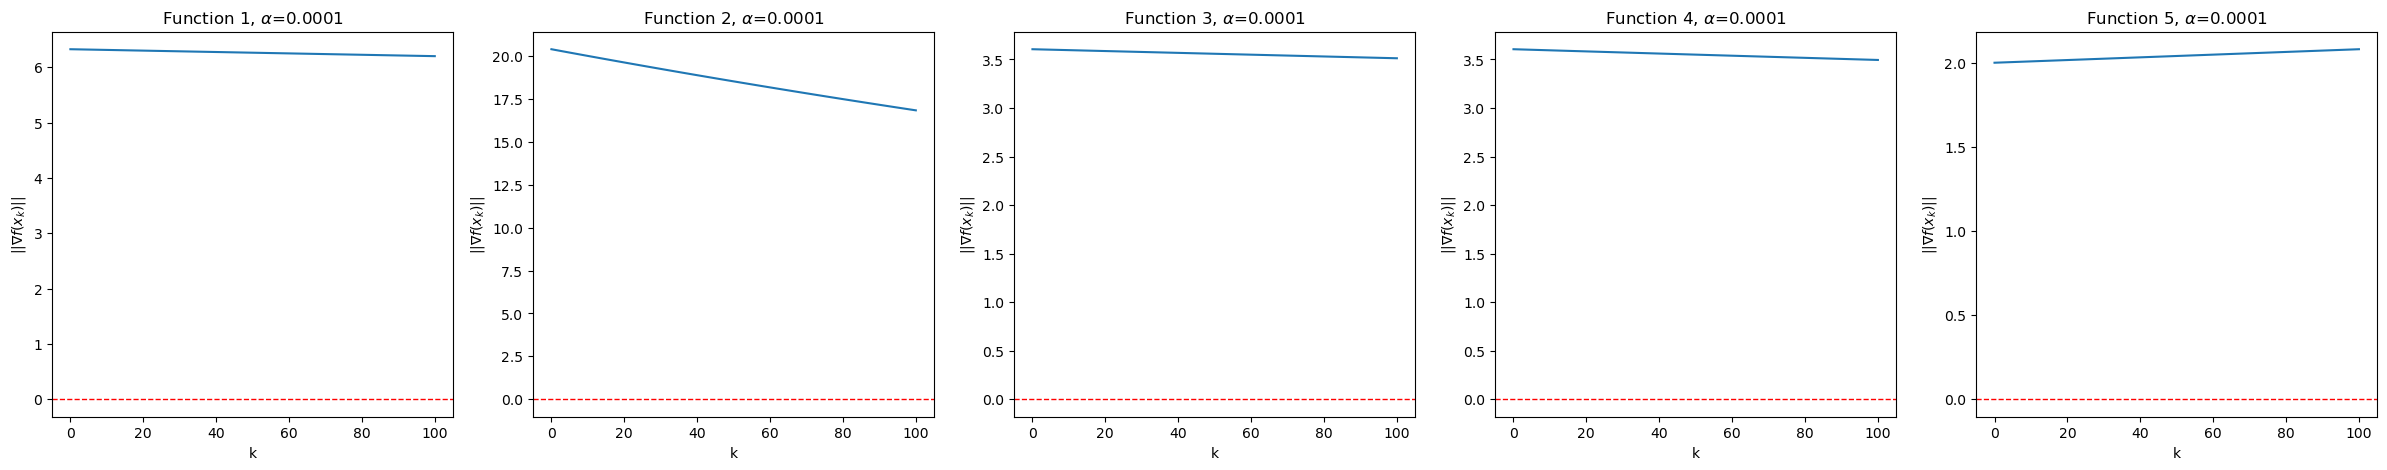

In [5]:
from functools import partial

x0 = np.zeros(2)
kmax = 100
tolf = tolx = 1e-5
alphas = [0.1, 0.01, 0.001, 0.0001]

lambda_fixed = 0.5

functions = [(fn1, grad_fn1),
    (fn2, grad_fn2),
    (fn3, grad_fn3),
    (partial(fn4, lambda_reg=lambda_fixed), partial(grad_fn4, lambda_reg=lambda_fixed)),
    (fn5, grad_fn5)]


for alpha in alphas:
    fig, axs = plt.subplots(ncols=5, figsize=(30, 5))
    for i, (f, grad_f) in enumerate(functions):
        if i < 4 :
            x_k_history, k, f_val_history, grad_norm_history = gradient_descent(f, grad_f, x0, alpha, kmax, tolx, tolf)
        else:
            x_k_history, k, f_val_history, grad_norm_history = gradient_descent(f, grad_f, np.zeros(1), alpha, kmax, tolx, tolf)
        print(f"Function {i+1}, alpha={alpha}, GD got final result: {x_k_history[-1]}, with {k} iterations, and grad_norm={grad_norm_history[-1]}")
        ax = axs[i]
        ax.plot(grad_norm_history)
        ax.set_title(rf'Function {i+1}, $\alpha$={alpha}')
        ax.set_xlabel('k')
        ax.set_ylabel(r'$||\nabla f(x_k)||$')
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    print("\n")
    plt.show()

- For function 2, when $\alpha$ = 0.1, the result is stuck on a value with $||\nabla f (x)|| >> 0$. However, reducing the $\alpha$ causes the result to converge to an actual point of minima.
- During the last trial (with $\alpha$ = 0.001), the GD reached the max iteration limit, and all functions stopped at a point with $||\nabla f (x)|| >> 0$. This indicates that the step size was too low for the functions to converge in a smaller amount of steps.
- For function 2, $\alpha$ = 0.01 seems to be the best step length, while all other functions converged without reaching the max iteration limit when $\alpha = 0.1$.


Function 1, GD with backtracking got final result: [2.99993978 0.99997993], with 81 iterations, and grad_norm=0.00012696449525289447
Function 2, GD with backtracking got final result: [1.         1.99990644], with 80 iterations, and grad_norm=0.00018712416290789236
Function 3, GD with backtracking got final result: [0.9999317  1.00004419], with 50 iterations, and grad_norm=3.1375723680433264e-05
Function 4, GD with backtracking got final result: [0.79672012 1.03898443], with 9 iterations, and grad_norm=0.4584376289486622
Function 5, GD with backtracking got final result: [0.92218332], with 47 iterations, and grad_norm=0.0004868777899496024




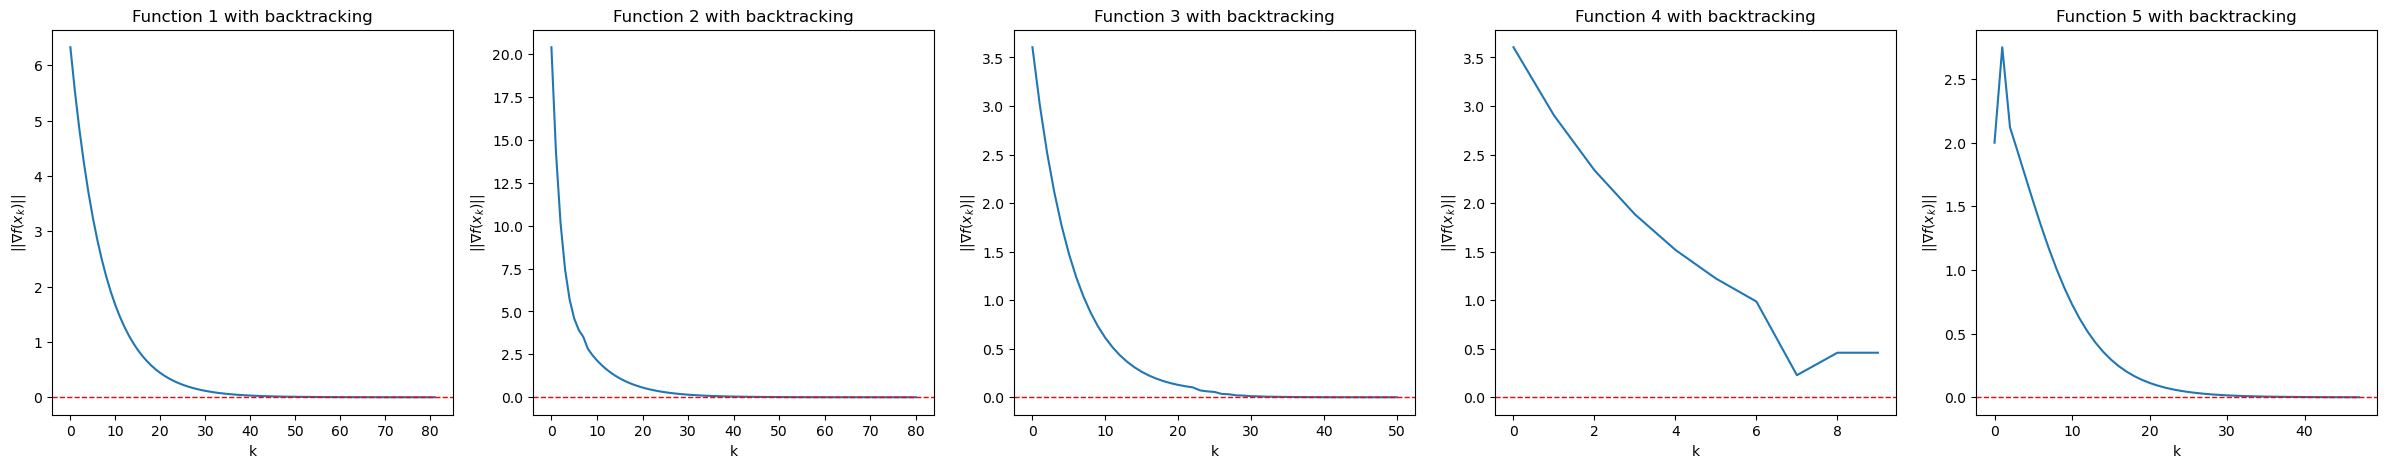

In [6]:
x0 = np.zeros(2)
kmax = 100
tolf = tolx = 1e-5
alphas = [0.1, 0.01, 0.001, 0.0001]

lambda_fixed = 0.5

functions = [(fn1, grad_fn1),
    (fn2, grad_fn2),
    (fn3, grad_fn3),
    (partial(fn4, lambda_reg=lambda_fixed), partial(grad_fn4, lambda_reg=lambda_fixed)),
    (fn5, grad_fn5)]

alpha = None

fig, axs = plt.subplots(ncols=5, figsize=(30, 5))
for i, (f, grad_f) in enumerate(functions):
    if i < 4 :
        x_k_history, k, f_val_history, grad_norm_history = gradient_descent(f, grad_f, x0, alpha, kmax, tolx, tolf, backtracking=backtracking)
    else:
        x_k_history, k, f_val_history, grad_norm_history = gradient_descent(f, grad_f, np.zeros(1), alpha, kmax, tolx, tolf, backtracking=backtracking)
    print(f"Function {i+1}, GD with backtracking got final result: {x_k_history[-1]}, with {k} iterations, and grad_norm={grad_norm_history[-1]}")
    ax = axs[i]
    ax.plot(grad_norm_history)
    ax.set_title(rf'Function {i+1} with backtracking')
    ax.set_xlabel('k')
    ax.set_ylabel(r'$||\nabla f(x_k)||$')
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
print("\n")

- Beside function 3, all other function achieve good results using backtracking, since their $||\nabla f (x)|| \sim 0$.
- For function 3, the result is close to what was achieve when $\alpha$ = 0.001 with GD without backtracking, which was also the worst result compared to the other step sizes used on function 3.

### Plotting the error $||x_k - x^*||_2$ for function 1 and 2

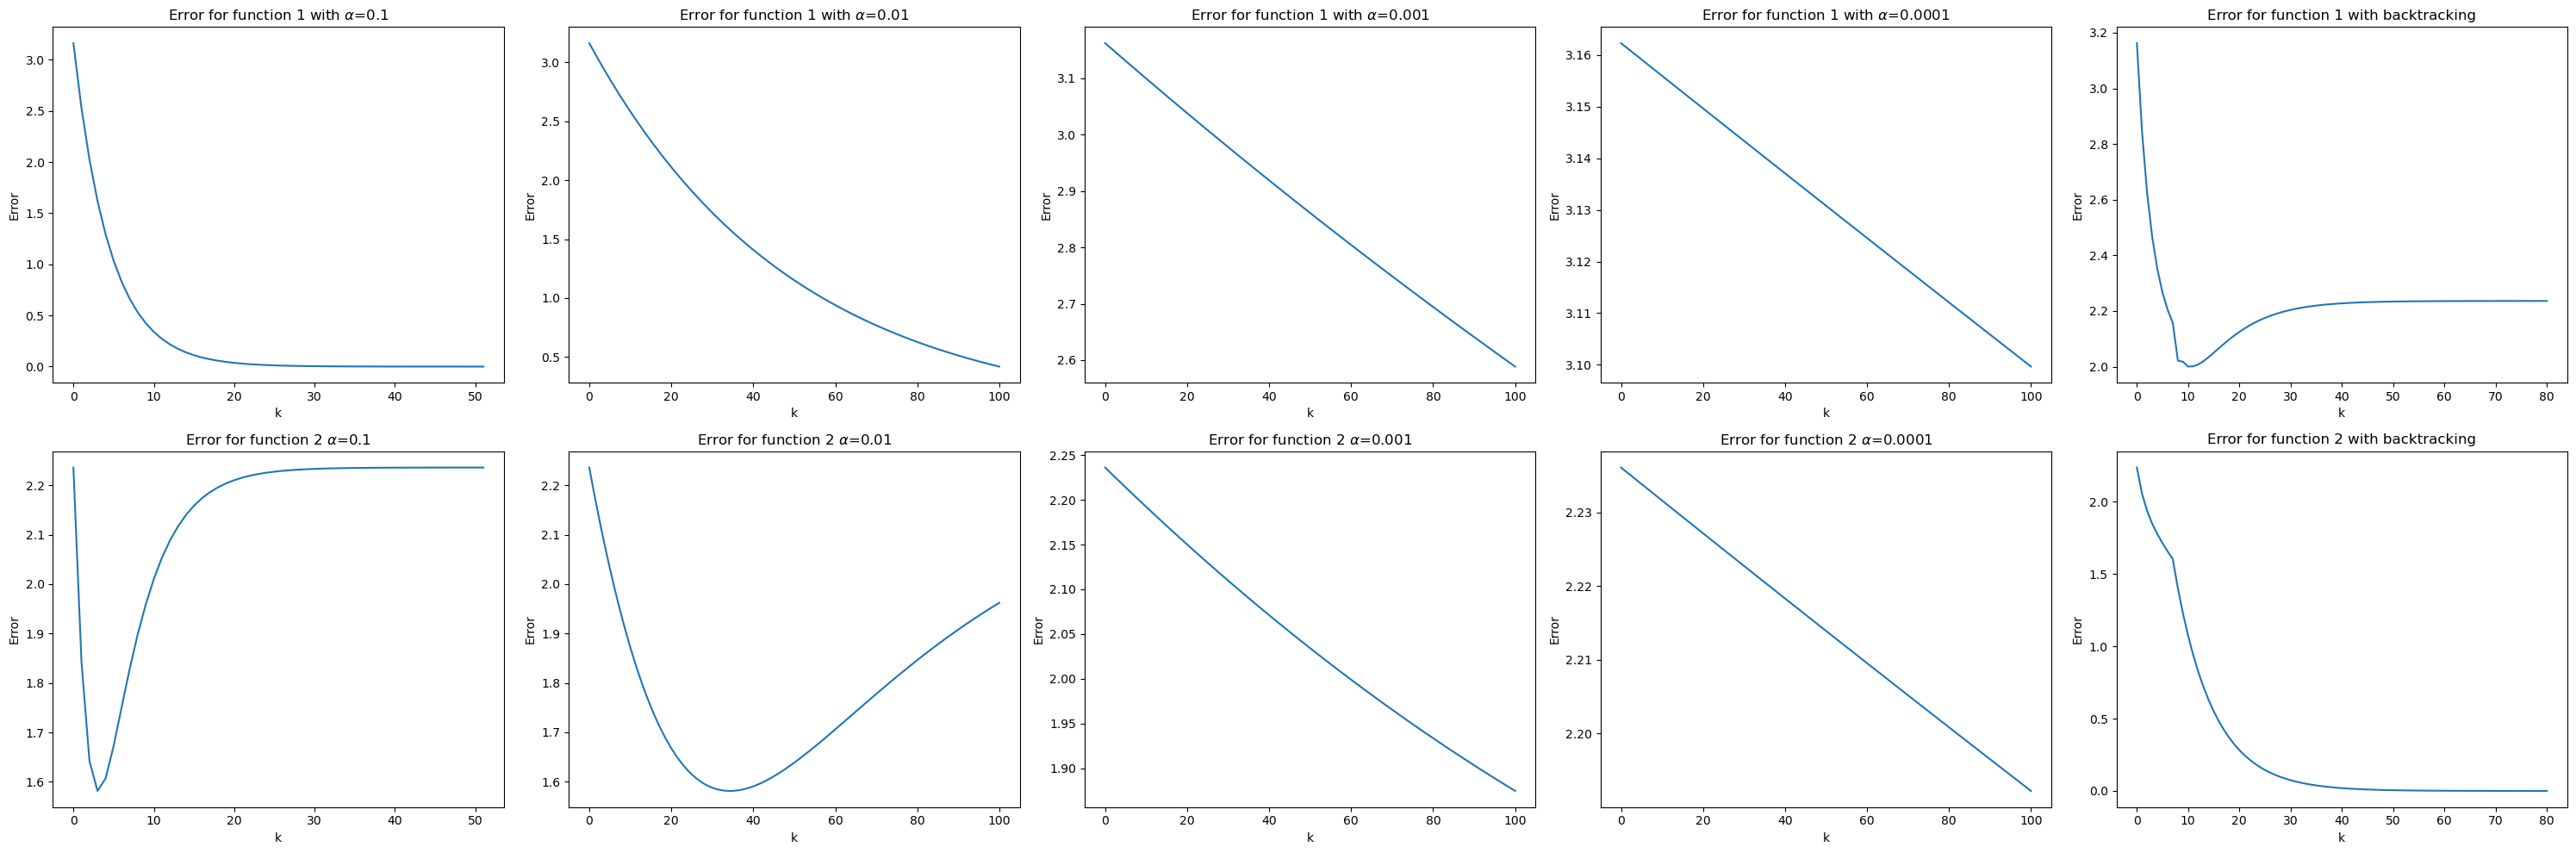

In [7]:
kmax = 100
tolf = tolx = 1e-5
alphas = [0.1, 0.01, 0.001, 0.0001]
x0 = np.zeros(2)

x_star_f1 = np.array([3, 1])
x_star_f2 = np.array([1, 2])

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(30, 2 * 5))

# Function 1
for col, alpha in enumerate(alphas):
    if col < 4:
        x_k_history, k, _, grad_norm_history = gradient_descent(fn1, grad_fn1, x0, alpha, kmax, tolx, tolf)
    else:
        continue
    errors_f1 = [np.linalg.norm(x_k - x_star_f1) for x_k in x_k_history]
    ax = axs[0, col]
    ax.plot(errors_f1)
    ax.set_title(rf'Error for function 1 with $\alpha$={alpha}')
    ax.set_xlabel('k')
    ax.set_ylabel('Error')

x_k_history, k, _, grad_norm_history = gradient_descent(fn2, grad_fn2, x0, None, kmax, tolx, tolf, backtracking=backtracking)
errors_f1 = [np.linalg.norm(x_k - x_star_f1) for x_k in x_k_history]
ax = axs[0, -1]
ax.plot(errors_f1)
ax.set_title(rf'Error for function 1 with backtracking')
ax.set_xlabel('k')
ax.set_ylabel('Error')

# Function 2
for col, alpha in enumerate(alphas):
    if col < 4:
        x_k_history, k, _, grad_norm_history = gradient_descent(fn1, grad_fn1, x0, alpha, kmax, tolx, tolf)
    else:
        continue

    errors_f2 = [np.linalg.norm(x_k - x_star_f2) for x_k in x_k_history]
    ax = axs[1, col]
    ax.plot(errors_f2)
    ax.set_title(rf'Error for function 2 $\alpha$={alpha}')
    ax.set_xlabel('k')
    ax.set_ylabel('Error')

x_k_history, k, _, grad_norm_history = gradient_descent(fn2, grad_fn2, x0, None, kmax, tolx, tolf, backtracking=backtracking)
errors_f2 = [np.linalg.norm(x_k - x_star_f2) for x_k in x_k_history]
ax = axs[1, -1]
ax.plot(errors_f2)
ax.set_title(rf'Error for function 2 with backtracking')
ax.set_xlabel('k')
ax.set_ylabel('Error')


plt.tight_layout()
plt.show()

### Function 4 with varying $\lambda$

Function 4 with lambda=0.01, alpha=0.1, with 100 iterations, and grad_norm=2493.2904720365623
Function 4 with lambda=0.01, alpha=0.01, with 100 iterations, and grad_norm=0.09804585575077976
Function 4 with lambda=0.01, alpha=0.001, with 100 iterations, and grad_norm=8.329840177702005
Function 4 with lambda=0.01, alpha=0.0001, with 100 iterations, and grad_norm=48.597319956844764
Function 4 with lambda=0.01, backtracking, with 31 iterations, and grad_norm=0.05403106466905993
Function 4 with lambda=0.1, alpha=0.1, with 100 iterations, and grad_norm=5911.090837153559
Function 4 with lambda=0.1, alpha=0.01, with 100 iterations, and grad_norm=0.08947260693790893
Function 4 with lambda=0.1, alpha=0.001, with 100 iterations, and grad_norm=8.253871749792193
Function 4 with lambda=0.1, alpha=0.0001, with 100 iterations, and grad_norm=48.55351342883185
Function 4 with lambda=0.1, backtracking, with 19 iterations, and grad_norm=0.09235724262983765
Function 4 with lambda=1, alpha=0.1, with 100 ite

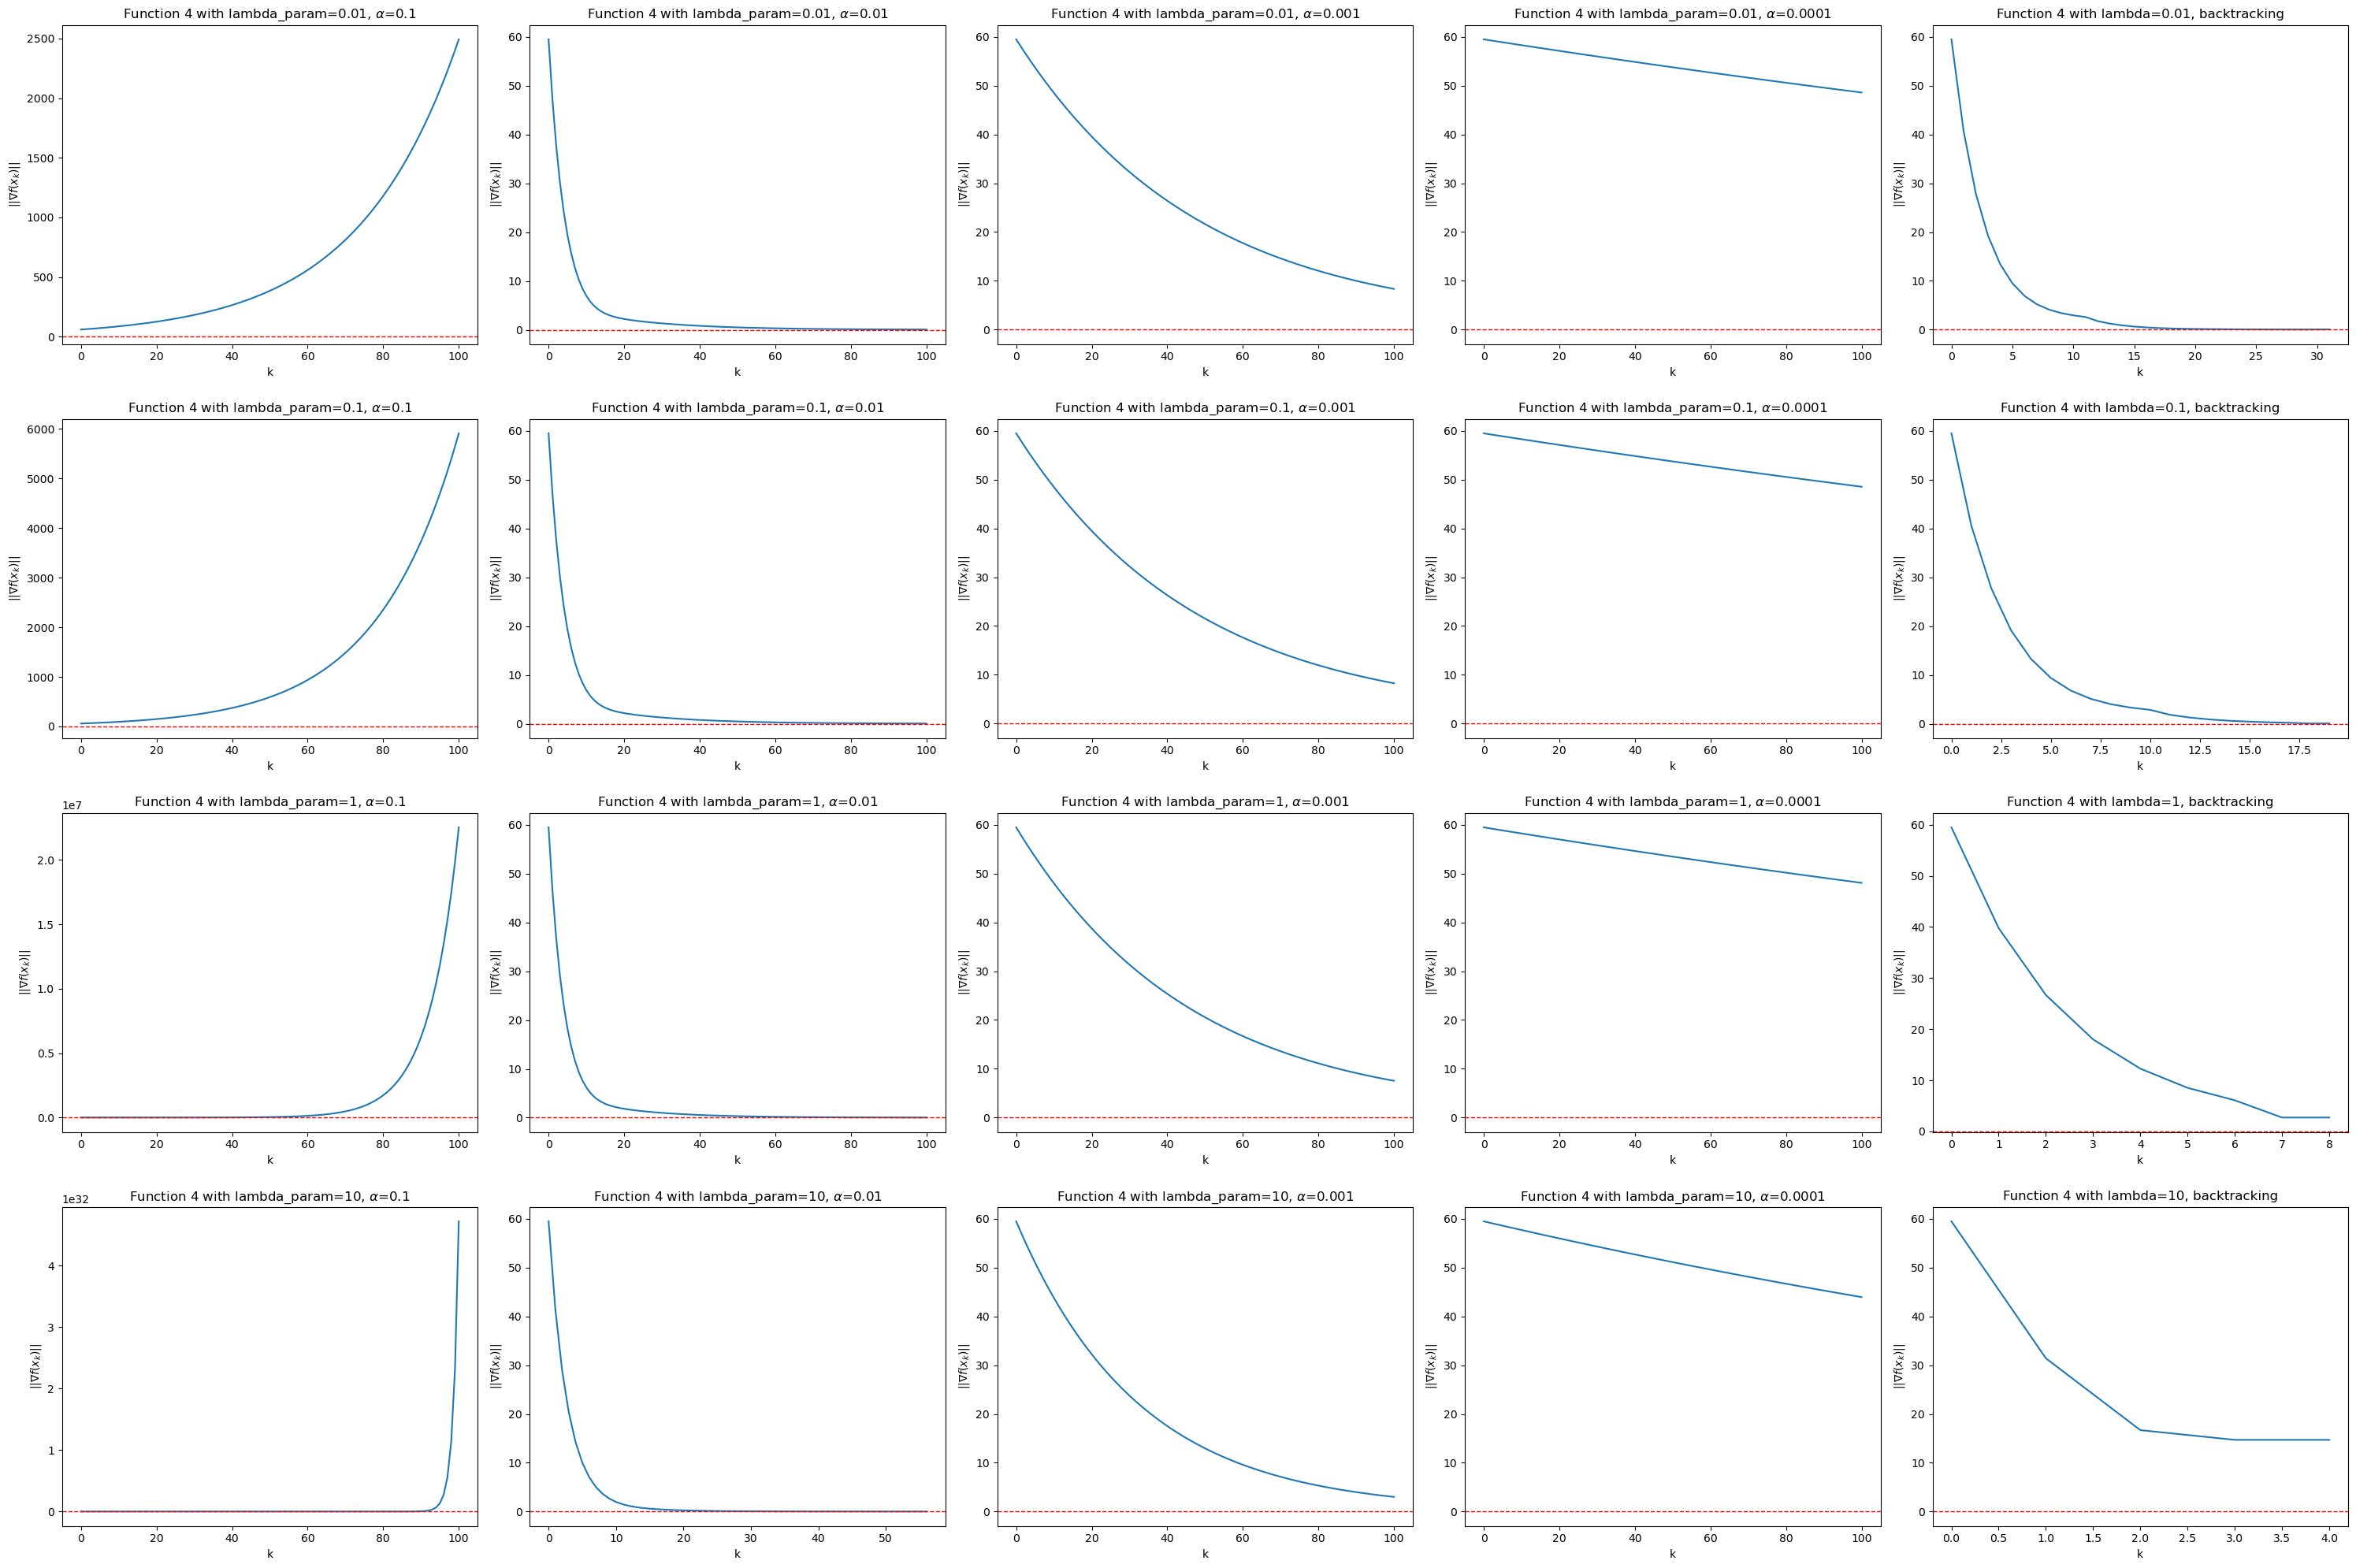

In [8]:
kmax = 100
tolf = tolx = 1e-5
alphas = [0.1, 0.01, 0.001, 0.0001]
lambda_params = [0.01, 0.1, 1, 10]
x0 = np.zeros(10)

fig, axs = plt.subplots(nrows=len(lambda_params), ncols=5, figsize=(30, len(lambda_params) * 5))

for row, lambda_param in enumerate(lambda_params):
    fn4, grad_fn4 = partial(fn4, lambda_reg=lambda_param), partial(grad_fn4, lambda_reg=lambda_param)
    for col, alpha in enumerate(alphas):
        if col < 4:
            x_k_history, k, _, grad_norm_history = gradient_descent(fn4, grad_fn4, x0, alpha, kmax, tolx, tolf)
        else:
            continue

        ax = axs[row, col]
        ax.plot(grad_norm_history)
        ax.set_title(rf'Function 4 with lambda_param={lambda_param}, $\alpha$={alpha}')
        ax.set_xlabel('k')
        ax.set_ylabel(r'$||\nabla f(x_k)||$')
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
        print(f"Function 4 with lambda={lambda_param}, alpha={alpha}, with {k} iterations, and grad_norm={grad_norm_history[-1]}")

    x_k_history, k, _, grad_norm_history = gradient_descent(fn4, grad_fn4, x0, None, kmax, tolx, tolf, backtracking=backtracking)
    ax = axs[row, -1]
    ax.plot(grad_norm_history)
    ax.set_title(rf'Function 4 with lambda={lambda_param}, backtracking')
    ax.set_xlabel('k')
    ax.set_ylabel(r'$||\nabla f(x_k)||$')
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    print(f"Function 4 with lambda={lambda_param}, backtracking, with {k} iterations, and grad_norm={grad_norm_history[-1]}")



plt.tight_layout()
plt.show()

- A low value of $\lambda$ seems to affect the norm of the gradient, which becomes very large, especially when the value of $\alpha$ is large
- When using backtracking, higher $\lambda$ results in a lower amount of steps necessary for convergence. However, increasing values of $\lambda$ cause the norm of the gradient to stray away from 0 when using backtracking.

### Function 3 with varying $n$

Function 3 with n=5, alpha=0.1, with 100 iterations, and grad_norm=0.004136971549286537
Function 3 with n=5, alpha=0.01, with 100 iterations, and grad_norm=0.23015960421065731
Function 3 with n=5, alpha=0.001, with 100 iterations, and grad_norm=7.773153756058391
Function 3 with n=5, alpha=0.0001, with 100 iterations, and grad_norm=17.325465214481902
Function 3 with n=5, backtracking, with 100 iterations, and grad_norm=0.0023697311034411904
Function 3 with n=10, alpha=0.1, with 100 iterations, and grad_norm=2264.213809351227
Function 3 with n=10, alpha=0.01, with 100 iterations, and grad_norm=0.09904729342724451
Function 3 with n=10, alpha=0.001, with 100 iterations, and grad_norm=8.338323729278104
Function 3 with n=10, alpha=0.0001, with 100 iterations, and grad_norm=48.602189763526006
Function 3 with n=10, backtracking, with 100 iterations, and grad_norm=0.001479451748855433
Function 3 with n=15, alpha=0.1, with 100 iterations, and grad_norm=6.701758716309984e+36
Function 3 with n=15,

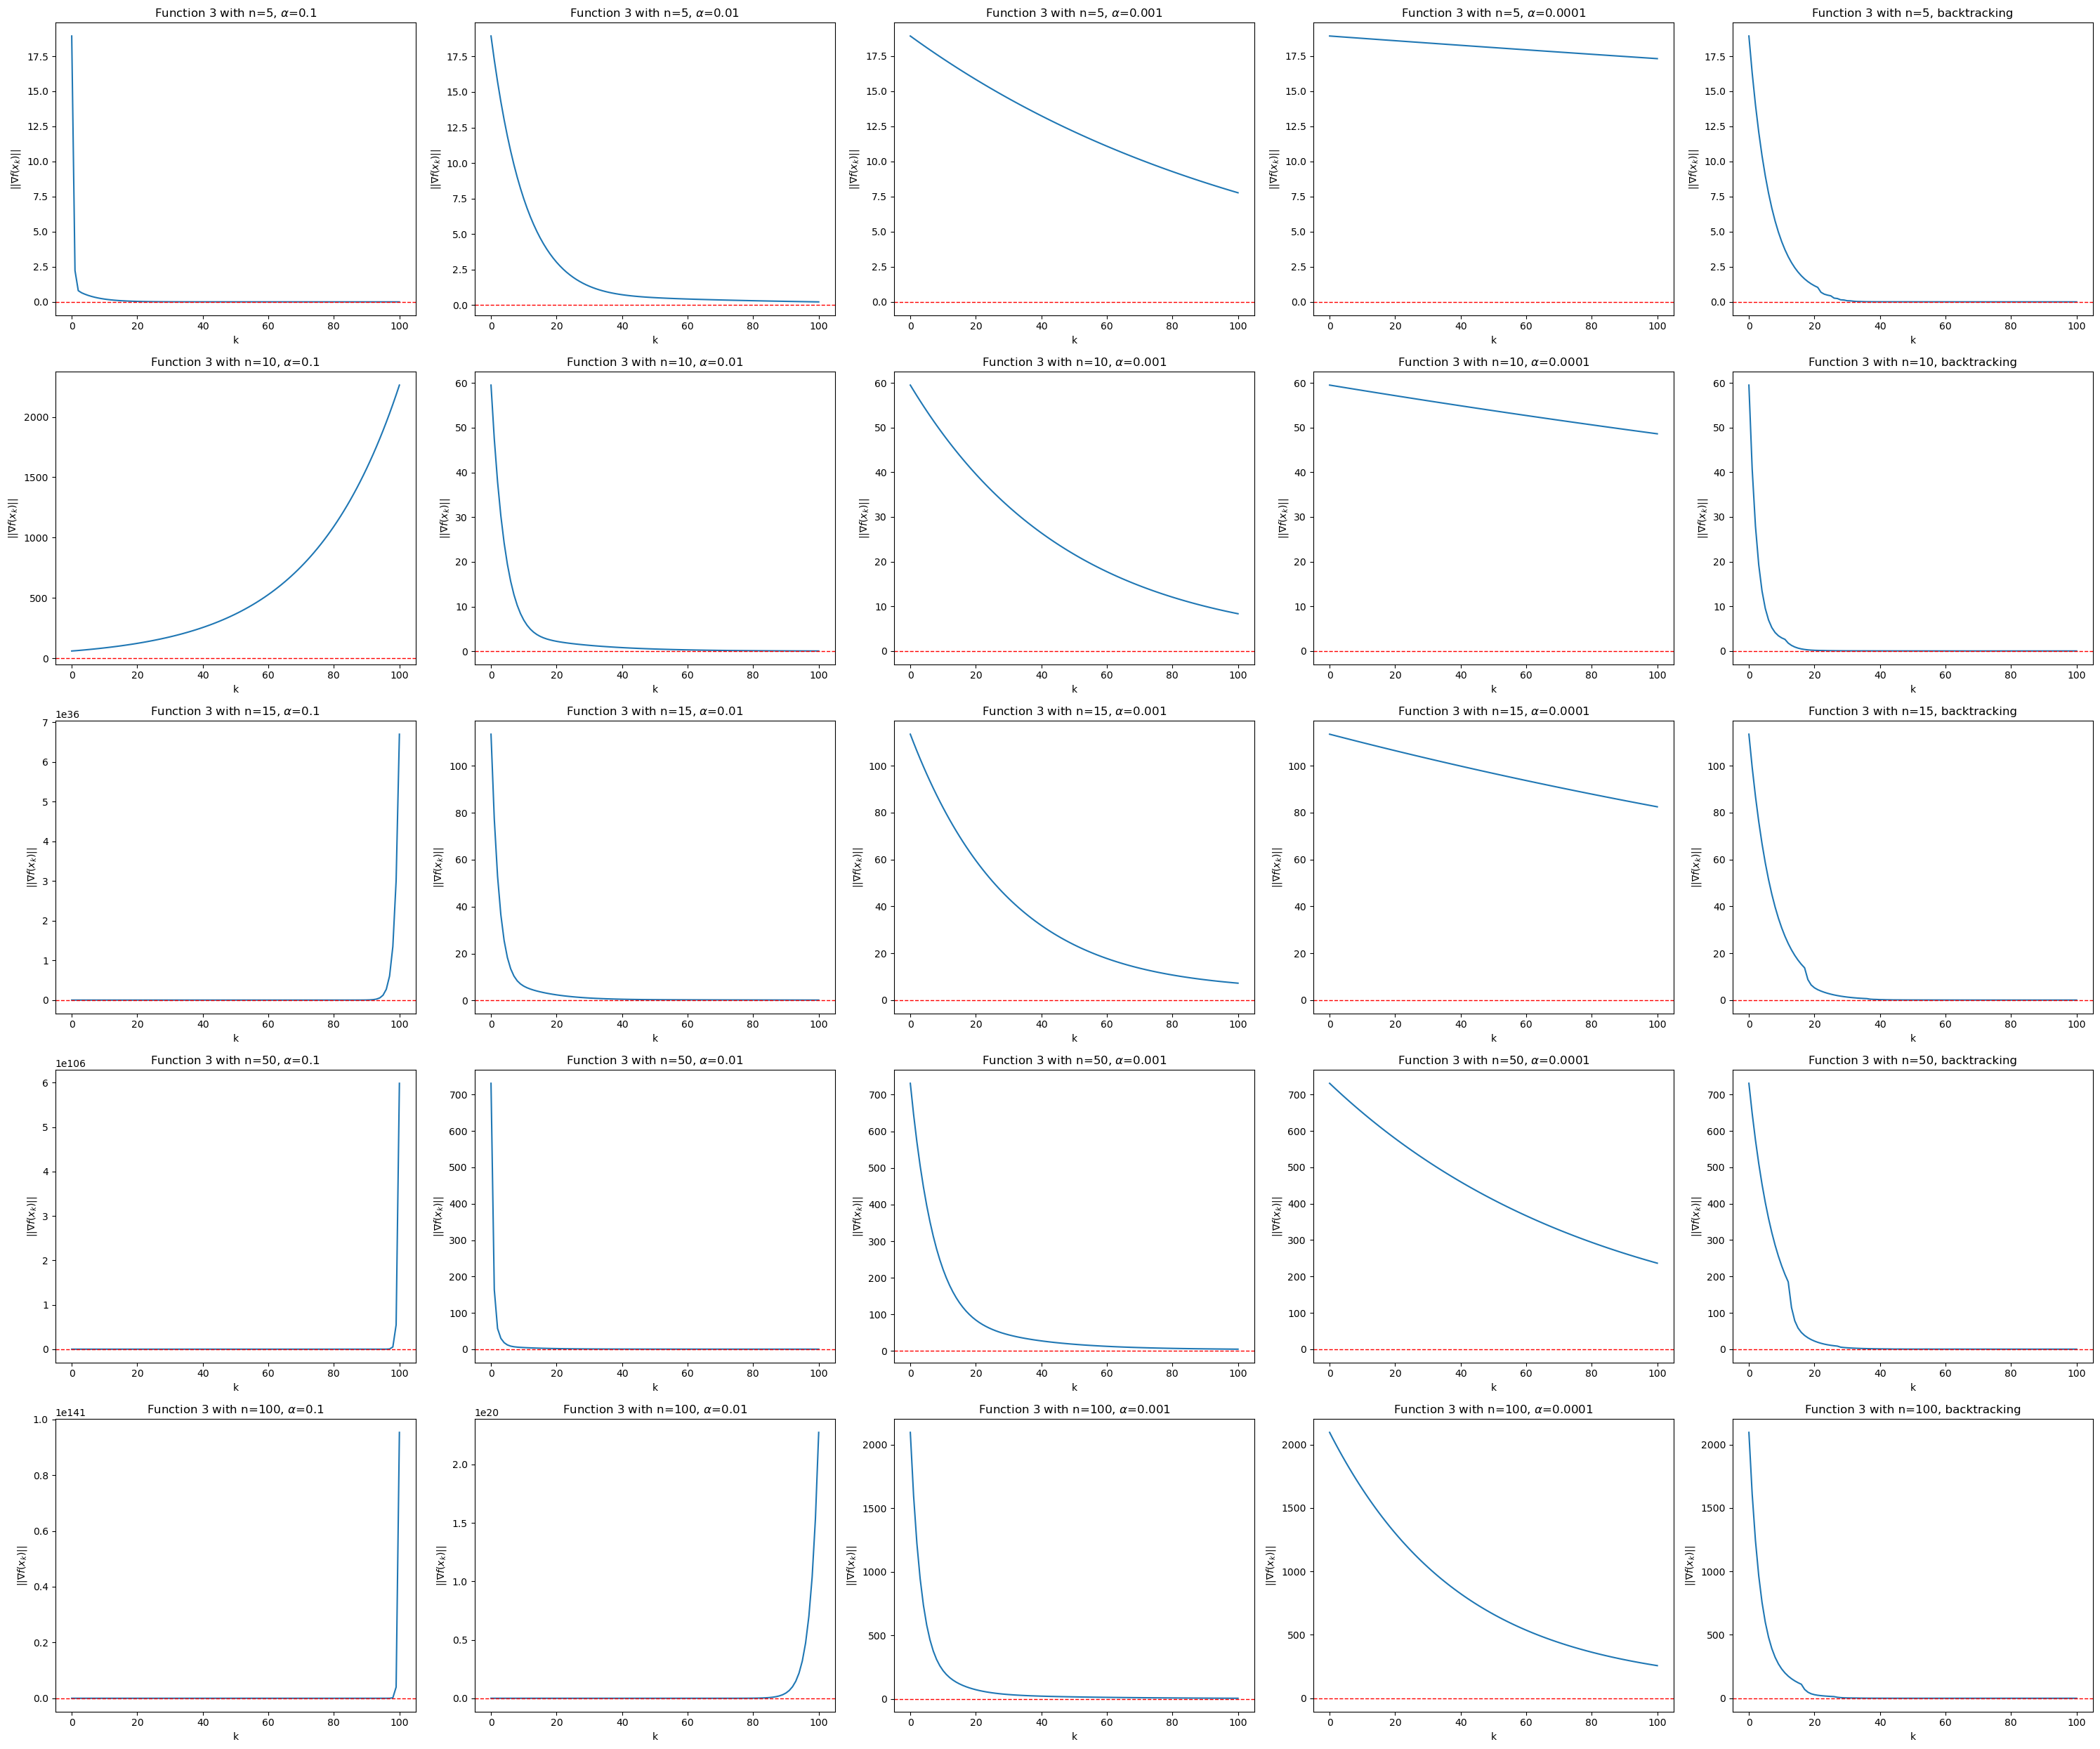

In [9]:
kmax = 100
tolf = tolx = 1e-5
alphas = [0.1, 0.01, 0.001, 0.0001]
n_to_try = [5, 10, 15, 50, 100]

fig, axs = plt.subplots(nrows=len(n_to_try), ncols=5, figsize=(30, len(n_to_try) * 5))

for row, n in enumerate(n_to_try):
    x0 = np.zeros(n)
    for col, alpha in enumerate(alphas):
        if col < 4:
            x_k_history, k, _, grad_norm_history = gradient_descent(fn3, grad_fn3, x0, alpha, kmax, tolx, tolf)
        else:
            continue

        ax = axs[row, col]
        ax.plot(grad_norm_history)
        ax.set_title(rf'Function 3 with n={n}, $\alpha$={alpha}')
        ax.set_xlabel('k')
        ax.set_ylabel(r'$||\nabla f(x_k)||$')
        ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
        print(f"Function 3 with n={n}, alpha={alpha}, with {k} iterations, and grad_norm={grad_norm_history[-1]}")

    x_k_history, k, _, grad_norm_history = gradient_descent(fn3, grad_fn3, x0, None, kmax, tolx, tolf, backtracking=backtracking)
    ax = axs[row, -1]
    ax.plot(grad_norm_history)
    ax.set_title(rf'Function 3 with n={n}, backtracking')
    ax.set_xlabel('k')
    ax.set_ylabel(r'$||\nabla f(x_k)||$')
    ax.axhline(y=0, color='red', linestyle='--', linewidth=1)
    print(f"Function 3 with n={n}, backtracking, with {k} iterations, and grad_norm={grad_norm_history[-1]}")

plt.tight_layout()
plt.show()

#### Plotting function 5

/tmp/ipykernel_722839/1556655710.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


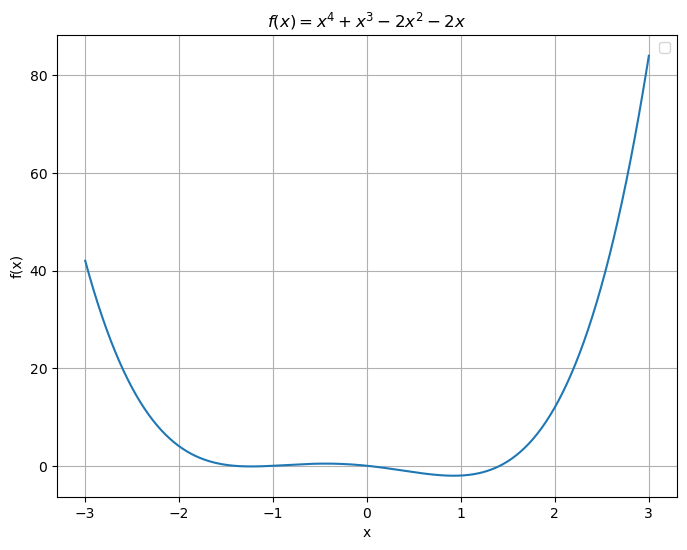

Function 5, alpha=0.01, x_0=-3, x_k=[-1.23252998], k=100, grad_norm=0.0019834679545898126, f(x_k)=[-0.13781738]
Function 5, alpha=0.01, x_0=-2, x_k=[-1.23248785], k=100, grad_norm=0.0016955540920111645, f(x_k)=[-0.13781746]
Function 5, alpha=0.01, x_0=-1, x_k=[-1.2319094], k=100, grad_norm=0.0022533030913960417, f(x_k)=[-0.1378173]
Function 5, alpha=0.01, x_0=0, x_k=[0.9221562], k=95, grad_norm=0.0008052009670187488, f(x_k)=[-2.03774801]
Function 5, alpha=0.01, x_0=1, x_k=[0.92229786], k=55, grad_norm=0.0008578684842759365, f(x_k)=[-2.03774801]
Function 5, alpha=0.01, x_0=2, x_k=[0.92229505], k=69, grad_norm=0.000824832991399127, f(x_k)=[-2.03774801]
Function 5, alpha=0.01, x_0=3, x_k=[0.92232057], k=67, grad_norm=0.0011244777827910113, f(x_k)=[-2.03774799]
Function 5, alpha=0.05, x_0=-3, x_k=[0.92219498], k=13, grad_norm=0.0003500196020342905, f(x_k)=[-2.03774804]
Function 5, alpha=0.05, x_0=-2, x_k=[-1.23226007], k=20, grad_norm=0.0001396369614647952, f(x_k)=[-0.13781767]
Function 5,

/tmp/ipykernel_722839/3494295079.py:51: RuntimeWarning: overflow encountered in power
  return x**4 + x**3 - 2*x**2 - 2*x
/tmp/ipykernel_722839/3494295079.py:54: RuntimeWarning: overflow encountered in power
  return 4*x**3 + 3*x**2 - 4*x - 2
/tmp/ipykernel_722839/3494295079.py:54: RuntimeWarning: overflow encountered in square
  return 4*x**3 + 3*x**2 - 4*x - 2
/tmp/ipykernel_722839/3494295079.py:51: RuntimeWarning: overflow encountered in square
  return x**4 + x**3 - 2*x**2 - 2*x
/tmp/ipykernel_722839/3494295079.py:51: RuntimeWarning: invalid value encountered in subtract
  return x**4 + x**3 - 2*x**2 - 2*x
/tmp/ipykernel_722839/3494295079.py:54: RuntimeWarning: invalid value encountered in add
  return 4*x**3 + 3*x**2 - 4*x - 2
/tmp/ipykernel_722839/3494295079.py:51: RuntimeWarning: invalid value encountered in add
  return x**4 + x**3 - 2*x**2 - 2*x


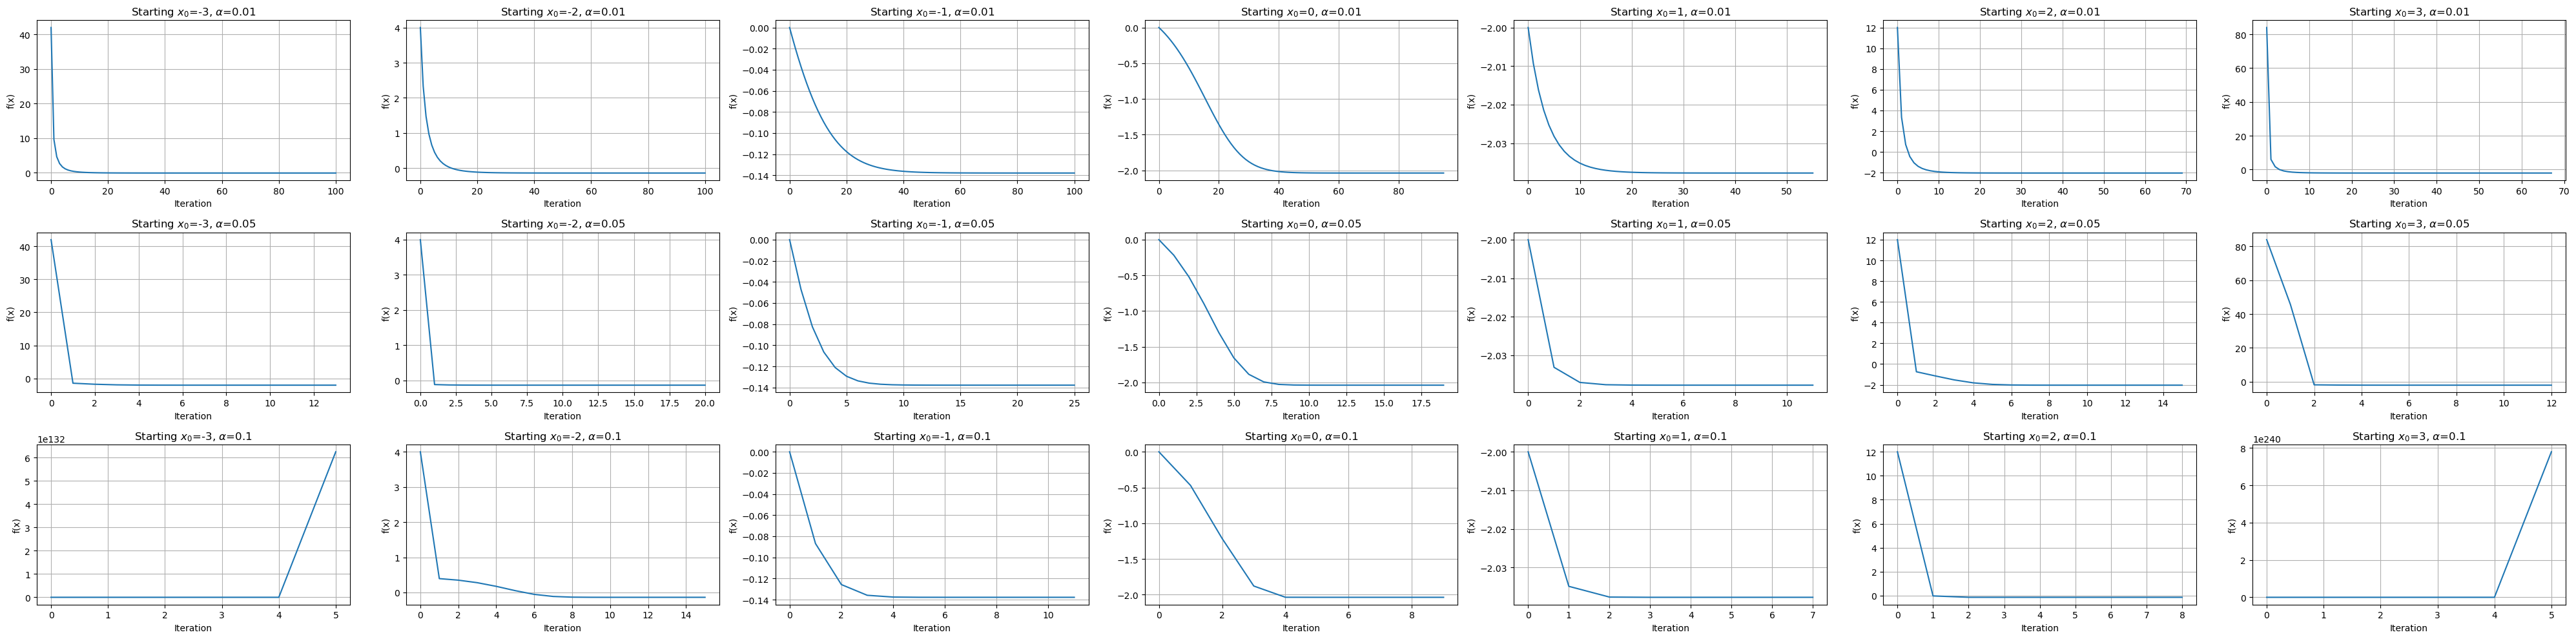

In [10]:
x = np.linspace(-3, 3, 400)
y = fn5(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = x^4 + x^3 - 2x^2 - 2x$')
plt.grid(True)
plt.legend()
plt.show()

x0s = [-3, -2, -1, 0, 1, 2, 3]
alphas = [0.01, 0.05, 0.1]

fig, axs = plt.subplots(ncols=(len(x0s)*len(alphas) + 2) // 3, nrows=3, figsize=(40, 10))
axs = axs.flatten()

plot_index = 0
for alpha in alphas:
    for x0 in x0s:
        x_k_history, k, f_val_history, grad_norm_history = gradient_descent(fn5, grad_fn5, np.array([x0]), alpha, kmax, tolx, tolf)
        axs[plot_index].plot(f_val_history)
        axs[plot_index].grid(True)
        axs[plot_index].set_title(rf'Starting $x_0$={x0}, $\alpha$={alpha}')
        axs[plot_index].set_xlabel('Iteration')
        axs[plot_index].set_ylabel('f(x)')
        plot_index += 1
        print(f"Function 5, alpha={alpha}, x_0={x0}, x_k={x_k_history[-1]}, k={k}, grad_norm={grad_norm_history[-1]}, f(x_k)={f_val_history[-1]}")


plt.tight_layout()
plt.show()

The global minima for function 5 is for $x_k \sim$ 0.922, with $f(x_k) \sim$ -2.04. We can notice it both on the graph of function 5, and by examining the various that, given the various values of $x_0$, the value of $f(x)$ is the lowest at that point and its gradient is close to 0, concerning the interval $[-3,3]$.

The global minima is reached only if the starting point is higher 0.

### Contour plots for function 1 and 2

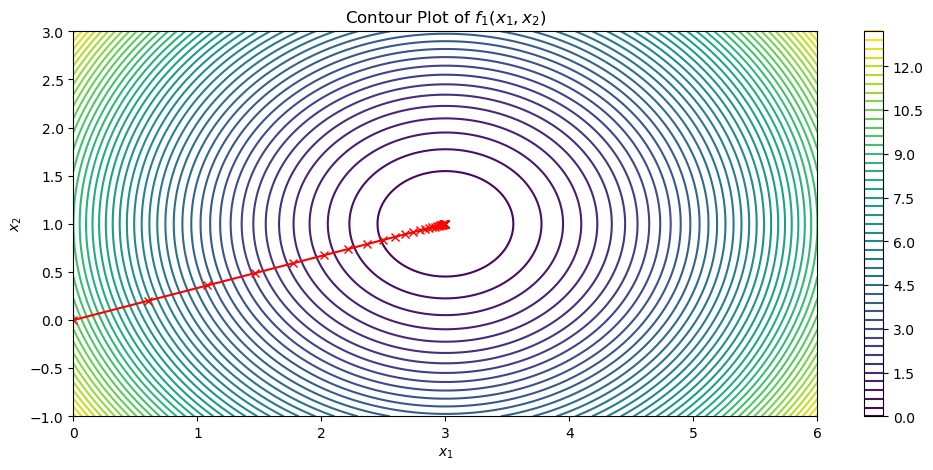

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 6, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z1 = fn1((X1, X2))

plt.figure(figsize=(12, 5))
plt.contour(X1, X2, Z1, levels=50)
plt.colorbar()
plt.title('Contour Plot of $f_1(x_1, x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Gradient descent path for function 1
x0 = np.zeros(2)
kmax = 100
tolf = tolx = 1e-5
alpha = 0.1
x_k_history, _, _, _ = gradient_descent(fn1, grad_fn1, x0, alpha, kmax, tolx, tolf)
x_coords = [point[0] for point in x_k_history]
y_coords = [point[1] for point in x_k_history]
plt.plot(x_coords, y_coords, marker='x', color='red')
plt.show()

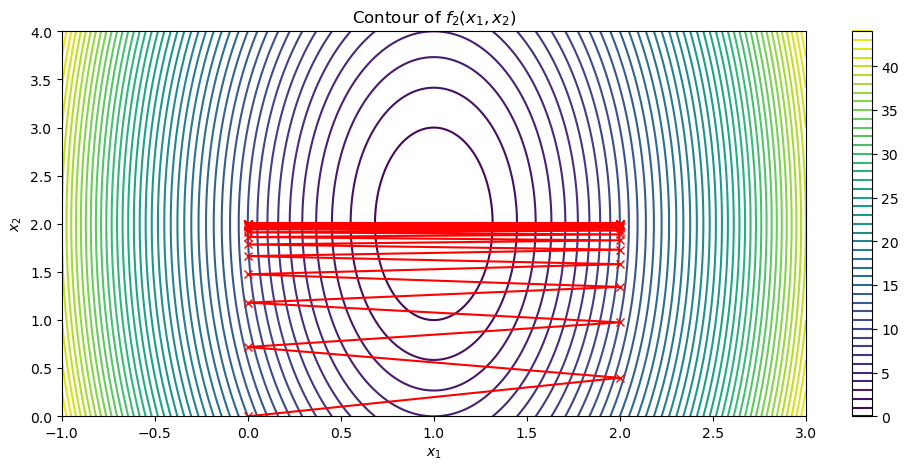

In [12]:
x1 = np.linspace(-1, 3, 400)
x2 = np.linspace(0, 4, 400)
X1, X2 = np.meshgrid(x1, x2)
Z2 = fn2((X1, X2))

plt.figure(figsize=(12, 5))
plt.contour(X1, X2, Z2, levels=50)
plt.colorbar()
plt.title('Contour of $f_2(x_1, x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

x_k_history, _, _, _ = gradient_descent(fn2, grad_fn2, x0, alpha, kmax, tolx, tolf)
x_coords = [point[0] for point in x_k_history]
y_coords = [point[1] for point in x_k_history]

plt.plot(x_coords, y_coords, marker='x', color='red')
plt.show()

### Contour with backtracking

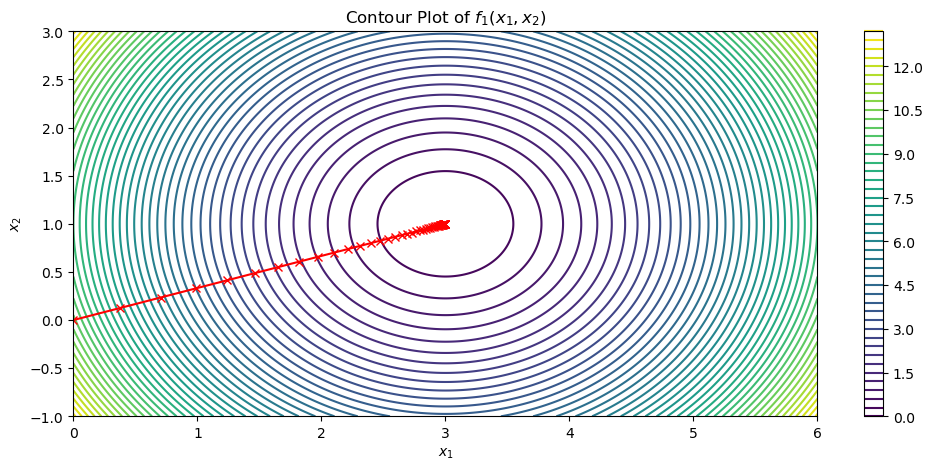

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 6, 400)
x2 = np.linspace(-1, 3, 400)
X1, X2 = np.meshgrid(x1, x2)
Z1 = fn1((X1, X2))

plt.figure(figsize=(12, 5))
plt.contour(X1, X2, Z1, levels=50)
plt.colorbar()
plt.title('Contour Plot of $f_1(x_1, x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

# Gradient descent path for function 1
x0 = np.zeros(2)
kmax = 100
tolf = tolx = 1e-5
alpha = None
x_k_history, _, _, _ = gradient_descent(fn1, grad_fn1, x0, alpha, kmax, tolx, tolf, backtracking=backtracking)
x_coords = [point[0] for point in x_k_history]
y_coords = [point[1] for point in x_k_history]
plt.plot(x_coords, y_coords, marker='x', color='red')
plt.show()

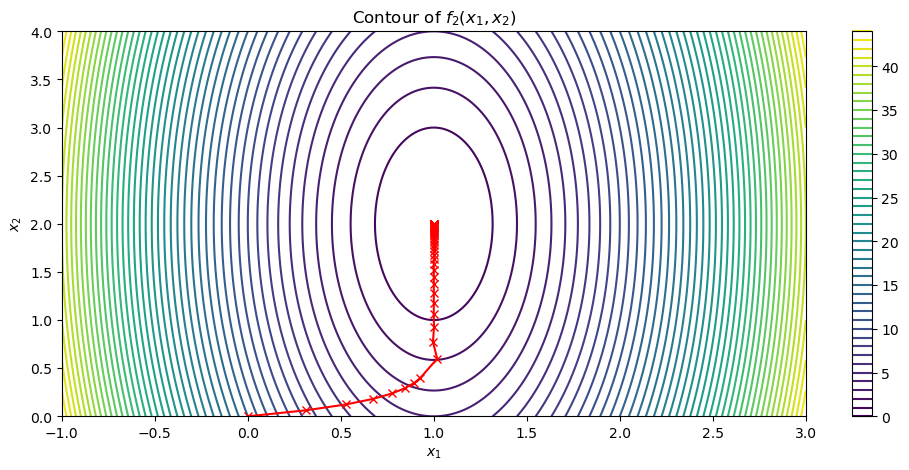

In [14]:
x1 = np.linspace(-1, 3, 400)
x2 = np.linspace(0, 4, 400)
X1, X2 = np.meshgrid(x1, x2)
Z2 = fn2((X1, X2))

plt.figure(figsize=(12, 5))
plt.contour(X1, X2, Z2, levels=50)
plt.colorbar()
plt.title('Contour of $f_2(x_1, x_2)$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

x_k_history, _, _, _ = gradient_descent(fn2, grad_fn2, x0, alpha, kmax, tolx, tolf, backtracking=backtracking)
x_coords = [point[0] for point in x_k_history]
y_coords = [point[1] for point in x_k_history]

plt.plot(x_coords, y_coords, marker='x', color='red')
plt.show()